In [2]:
import torch
from torchvision.models import vgg16
from datasets import PascalVOC2012, CamVid
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms.functional as F

In [3]:
from fcn_model import FCNModel
import numpy as np
import matplotlib.pyplot as plt

# CAMVID

In [4]:
model0 = FCNModel(n_classes=11)

In [29]:
model0.from_file('/project/fcn8s_camvid_adam_bs8_lr0.0001_e50.pt')

In [16]:
dataset0 = CamVid('val')
len(dataset0)

101

In [11]:
data0 = dataset0[0]

127

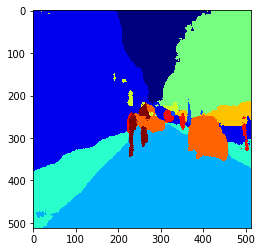

In [30]:
result = model0(data0['image'].unsqueeze(0))
out = result.detach().numpy()[0].argmax(axis=0)*(255/20)
out = out.astype('uint8')
plt.imshow(out, cmap='jet')
out.max()

(512, 512)


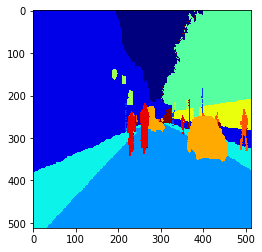

In [18]:
label = data0['label'].numpy()
plt.imshow(label, cmap='jet')
print(label.shape)

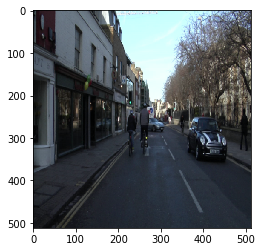

In [14]:
img = data0['image'].numpy()
img = np.transpose(img, (1, 2, 0))
img = (img - img.min())/(img.max()-img.min())
plt.imshow(img)

# PASCALVOC2012

In [32]:
model = FCNModel()

In [41]:
model.from_file('/project/fcn8s_pascal_adam_bs8_lr1e-05_e100.pt')

In [34]:
dataset = PascalVOC2012('val')

In [35]:
data = dataset[9]

191

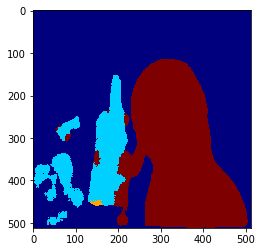

In [43]:
result = model(data['image'].unsqueeze(0))
out = result.detach().numpy()[0].argmax(axis=0)*(255/20)
out = out.astype('uint8')
plt.imshow(out, cmap='jet')
out.max()

(512, 512)


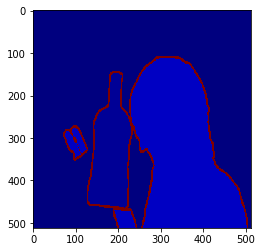

In [37]:
label = data['label'].numpy()
plt.imshow(label, cmap='jet')
print(label.shape)

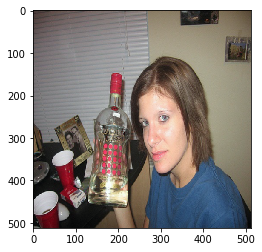

In [38]:
img = data['image'].numpy()
img = np.transpose(img, (1, 2, 0))
img = (img - img.min())/(img.max()-img.min())
plt.imshow(img)